In [24]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

1.12.0


In [25]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [26]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [27]:
train_images.shape

(60000, 28, 28)

In [28]:
len(train_labels)

60000

In [29]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [30]:
test_images.shape

(10000, 28, 28)

In [31]:
len(test_labels)

10000

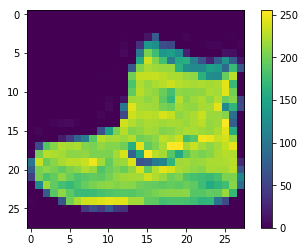

In [32]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

In [33]:
train_images = train_images / 255.0
test_images = test_images / 255.0

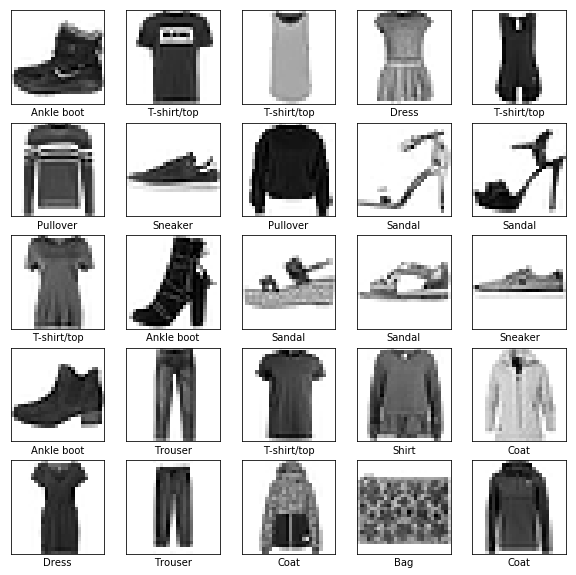

In [34]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap = plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [35]:
model = keras.Sequential([keras.layers.Flatten(input_shape = (28, 28)), 
                          keras.layers.Dense(128, activation = tf.nn.relu), 
                          keras.layers.Dense(10, activation = tf.nn.softmax)])

In [36]:
model.compile(optimizer = tf.train.AdamOptimizer(), 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

In [37]:
model.fit(train_images, train_labels, epochs = 5)

Epoch 1/5
60000/60000 [==============================] - 3s 48us/step - loss: 0.5013 - acc: 0.8238
Epoch 2/5
60000/60000 [==============================] - 3s 46us/step - loss: 0.3770 - acc: 0.8640
Epoch 3/5
60000/60000 [==============================] - 3s 45us/step - loss: 0.3382 - acc: 0.8767
Epoch 4/5
60000/60000 [==============================] - 3s 47us/step - loss: 0.3135 - acc: 0.8856
Epoch 5/5
60000/60000 [==============================] - 3s 51us/step - loss: 0.2951 - acc: 0.8913


In [38]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy: ', test_acc)

10000/10000 [==============================] - 0s 30us/step
Test accuracy:  0.8772


In [39]:
predictions = model.predict(test_images)

In [40]:
predictions[0]

array([2.1507778e-05, 2.4572692e-08, 6.9921055e-07, 3.5607417e-08,
       6.0101104e-07, 1.4311757e-03, 3.2856744e-05, 6.7509925e-03,
       3.8728074e-05, 9.9172336e-01], dtype=float32)

In [41]:
np.argmax(predictions[0])

9

In [42]:
test_labels[0]

9

In [43]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap = plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label], 
                                         100*np.max(predictions_array), 
                                         class_names[true_label]), 
               color = color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color = '#777777')
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

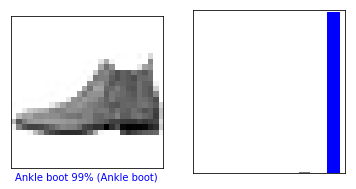

In [44]:
i = 0
plt.figure(figsize = (6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions, test_labels)

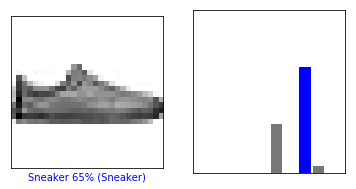

In [45]:
i = 12
plt.figure(figsize = (6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions, test_labels)

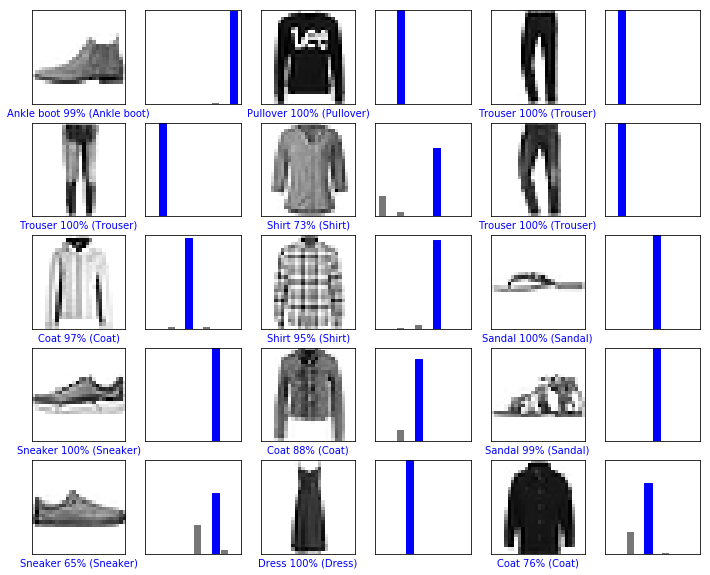

In [46]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize = (2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions, test_labels)